# Practical Lab 2
# Waseem Raja Shaik
# 8894805

- This lab provides insight into the concept of probability and statistical measures that you could use to classify the data as spam or not spam and also clean the data by removing the outliers using measures of central tendency and dispersion.
- The datasets have been enclosed

In [69]:
import numpy as np
import pandas as pd

1. Use the **Lab2 dataset** provided. Load the dataset and split it into test and train. After that, train the model using Gaussian and Multinominal classifiers and post which model performs better. Use the trained model to perform some predictions on test data.


In [70]:
spam_data = pd.read_csv('../../practical_labs/Lab2_dataset.csv')
spam_data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


### Clean Data
- Checking null values.

In [71]:
spam_data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [72]:
spam_data["label"] = np.where(spam_data.iloc[:, 1] == "ham", "not spam", "spam")

In [73]:
pd.unique(spam_data.iloc[:,1])

array(['not spam', 'spam'], dtype=object)

In [74]:
pd.unique(spam_data.iloc[:,3])

array([0, 1])

Column 2 and Column 4 provides same information of spam or not spam.
So, removing Column 2.

In [75]:
spam_data = spam_data.drop(columns=spam_data.columns[[1]])
spam_data

,Unnamed: 0,text,label_num
0,605,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,"Subject: photoshop , windows , office . cheap ...",1
4,2030,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...
5166,1518,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,Subject: industrial worksheets for august 2000...,0


- Checking if unnamed:0 has all unique values which can indicate that it's Unique ID.

In [76]:
spam_data.iloc[:,0].nunique() == spam_data.iloc[:,0].shape[0]

True

All Values are unique - So keeping unnamed:0 as ID.

- Change Column names

In [77]:
spam_data = spam_data.rename(columns={'Unnamed: 0': 'Id','text': 'message', 'label_num': 'spam'})
spam_data

,Id,message,spam
0,605,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,"Subject: photoshop , windows , office . cheap ...",1
4,2030,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...
5166,1518,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,Subject: industrial worksheets for august 2000...,0


In [79]:
spam_data.iloc[:,2]

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: spam, Length: 5171, dtype: int64

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(spam_data.iloc[:,1])
vocabulary = vectorizer.get_feature_names_out()
bag_of_words_df = pd.DataFrame(bag_of_words.toarray(), columns=vocabulary)
bag_of_words_df['Spam'] = spam_data.iloc[:,2]
print(bag_of_words_df.columns)

Index(['00', '000', '0000', '000000', '000000000002858', '000000000049773',
       '000080', '000099', '0001', '00018',
       ...
       'zyqtaqlt', 'zyrtec', 'zyyqywp', 'zzezrjok', 'zzn', 'zzo', 'zzocb',
       'zzso', 'zzsyt', 'Spam'],
      dtype='object', length=50448)


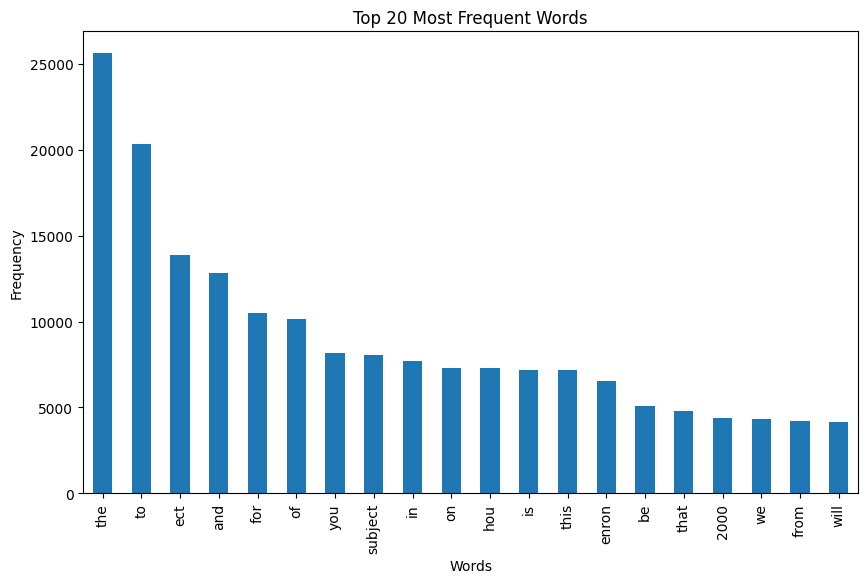

In [84]:
import matplotlib.pyplot as plt

# Calculate the sum of word frequencies across all documents
word_frequencies = bag_of_words_df.sum()

# Sort the word frequencies in descending order
sorted_word_frequencies = word_frequencies.sort_values(ascending=False)

# Plot the top 20 most frequent words
top_words = sorted_word_frequencies.head(20)
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.show()

In [89]:
from scipy import stats

# Remove outliers from bag_of_words_df
z_scores = stats.zscore(bag_of_words_df)
threshold = 3
outlier_rows = np.where(np.abs(z_scores) > threshold)[0]
bag_of_words_df = bag_of_words_df.drop(outlier_rows)

In [99]:
bag_of_words_df

      00  000  0000  000000  000000000002858  000000000049773  000080  000099   
154    0    0     0       0                0                0       0       0  \
182    0    0     0       0                0                0       0       0   
296    0    0     0       0                0                0       0       0   
363    0    0     0       0                0                0       0       0   
1130   0    0     0       0                0                0       0       0   
1279   0    0     0       0                0                0       0       0   
1369   0    0     0       0                0                0       0       0   
1508   0    0     0       0                0                0       0       0   
2184   0    0     0       0                0                0       0       0   
2538   0    0     0       0                0                0       0       0   
2665   0    0     0       0                0                0       0       0   
2680   0    0     0       0 

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

features = bag_of_words_df.drop('Spam', axis=1)
target = bag_of_words_df['Spam']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [92]:
gnb = GaussianNB()
gnb_predictions = gnb.fit(X_train, y_train).predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print("Gaussian Naive Bayes accuracy:", gnb_accuracy)

Gaussian Naive Bayes accuracy: 0.75


In [93]:
mnb = MultinomialNB()
mnb_predictions = mnb.fit(X_train, y_train).predict(X_test)
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
print("Multinomial Naive Bayes accuracy:", mnb_accuracy)

Multinomial Naive Bayes accuracy: 0.75


In [94]:
# Perform predictions on the test data using the best performing model
best_model = gnb if gnb_accuracy > mnb_accuracy else mnb
predictions = best_model.predict(X_test)
display(predictions)

array([1, 1, 1, 1])

In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F-score with zero_division parameter
precision = precision_score(y_test, predictions, average='macro', zero_division=0)
recall = recall_score(y_test, predictions, average='macro', zero_division=0)
f1 = f1_score(y_test, predictions, average='macro', zero_division=0)

# Print the precision, recall, and F-score
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f1)


Precision: 0.375
Recall: 0.5
F-score: 0.42857142857142855


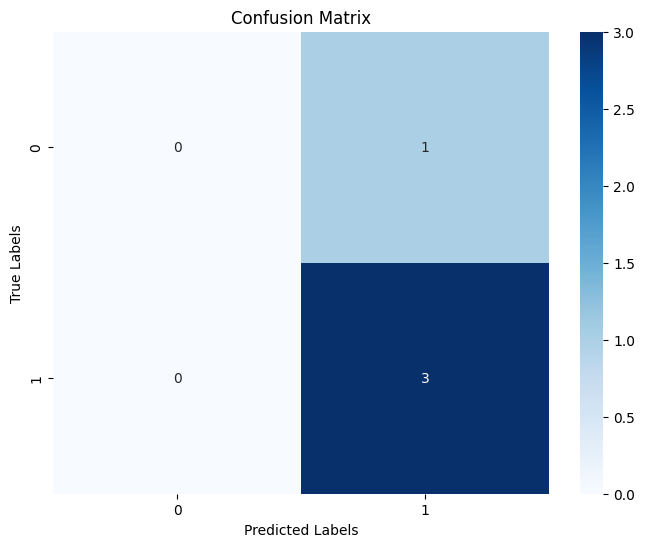

In [100]:
import seaborn as sns

# Create confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

- The observed accuracy of both Naive Bayes models is 0.75, indicating moderate performance in distinguishing between spam and non-spam messages.
- However, it's important to note that the accuracy alone may not provide a comprehensive evaluation, and other metrics like precision, recall, and F1-score should also be considered for a more complete assessment.

# Part B

Use this **air bnb new york city dataset** and remove outliers based on price per night for a given apartment/home. 
You can demonstrate why using other techniques like mean/median/ percentile works. 
The task is to come up with a clean dataset that does not have outliers showcasing all the possibilities.


In [104]:
# loading the air bnb dataset
airbnb = pd.read_csv('../../practical_labs/AB_NYC_2019.csv')
airbnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [105]:
airbnb.price.describe()


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

### Clean Data
- Checking Nulls

In [107]:
airbnb.price.isnull().sum()

0

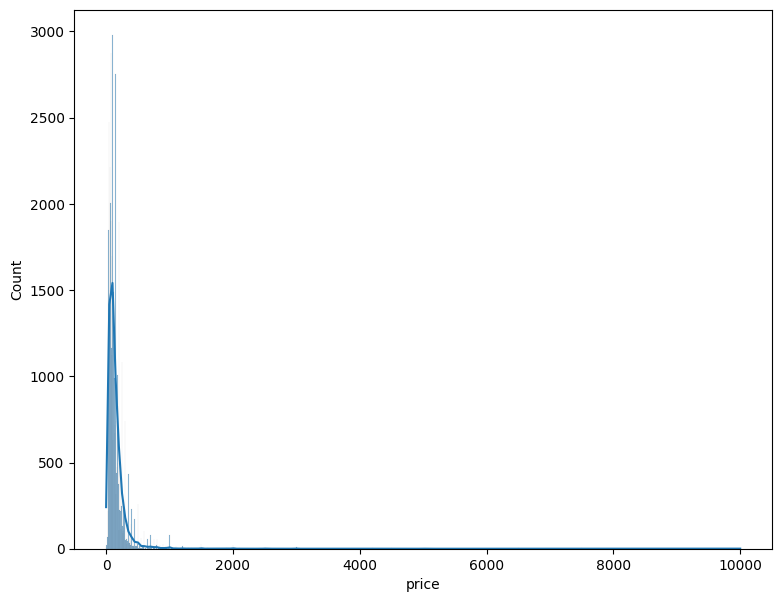

In [109]:
fig = plt.figure(figsize=(9,7))
sns.histplot(airbnb.price, kde=True)
plt.show()

In [110]:
mean_price = airbnb['price'].mean()
std_price = airbnb['price'].std()

# setting threshold for outliers
lower_threshold = mean_price - (3 * std_price)
upper_threshold = mean_price + (3 * std_price)

# Removing the outliers
mean_removed_outliers = airbnb[(airbnb['price'] >= lower_threshold) & (airbnb['price'] <= upper_threshold)]

mean_removed_outliers


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [111]:
median_price = airbnb['price'].median()

mean_absolute_deviation = np.median(np.abs(airbnb['price']- median_price))

lower_threshold = median_price - (3 * mean_absolute_deviation)
upper_threshold = median_price + (3 * mean_absolute_deviation)

# Removing the outliers
median_removed_outliers = airbnb[(airbnb['price'] >= lower_threshold) & (airbnb['price'] <= upper_threshold)]

median_removed_outliers


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [112]:
# lower percentiles 
lower_percentile = airbnb['price'].quantile(0.01)
# upper percentile
upper_percentile = airbnb['price'].quantile(0.99)

# removing the outliers
percentile_removed_outliers = airbnb[(airbnb['price'] >= lower_percentile) & (airbnb['price'] <= upper_percentile)]

percentile_removed_outliers


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [113]:
print("MEAN: \n",mean_removed_outliers.price.describe())


MEAN: 
 count    48507.000000
mean       138.746903
std        107.558233
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max        860.000000
Name: price, dtype: float64
MEDIAN: 
 count    42410.000000
mean       107.046168
std         52.848804
min          0.000000
25%         65.000000
50%         99.000000
75%        149.000000
max        244.000000
Name: price, dtype: float64
PERCENTILE: 
 count    48017.000000
mean       138.502010
std        103.694011
min         30.000000
25%         70.000000
50%        105.000000
75%        175.000000
max        799.000000
Name: price, dtype: float64
